In [4]:
#Importing all the necessary libraries
import pandas as pd
import networkx as nx 
import numpy as np 
import matplotlib.pyplot as plt

In [12]:
# Part 1: Extracting the Data
import tarfile

# Define the path to the tar.gz file
tar_path = 'facebook.tar.gz'

# Function to extract content from the tar file
def extract_file_content(tar, file_name):
    member = tar.getmember(file_name)
    extracted_file = tar.extractfile(member)
    if extracted_file is not None:
        return extracted_file.read().decode('utf-8')
    return ""

# Extract featnames files
with tarfile.open(tar_path, 'r:gz') as tar:
    featnames_files = [
        'facebook/3980.featnames', 'facebook/1684.featnames', 'facebook/698.featnames',
        'facebook/1912.featnames', 'facebook/414.featnames', 'facebook/3437.featnames',
        'facebook/348.featnames', 'facebook/686.featnames', 'facebook/107.featnames'
    ]
    
    combined_content = ""
    for file_name in featnames_files:
        combined_content += extract_file_content(tar, file_name) + "\n"

# Process combined content
split_data = combined_content.splitlines()

user_education_concentration = {}
user_education_degree = {}

# Create mapping for users with education concentration in their profiles
for line in split_data:
    if 'education;concentration;id;anonymized' in line:
        parts = line.split(';')
        user_id = parts[0]
        concentration = parts[2] + parts[3]
        if user_id not in user_education_concentration:
            user_education_concentration[user_id] = []
        user_education_concentration[user_id].append(concentration)

# Create mapping for users with education degree in their profiles
for line in split_data:
    if 'education;degree;id;anonymized' in line:
        parts = line.split(';')
        user_id = parts[0]
        degree = parts[2] + parts[3]
        if user_id not in user_education_degree:
            user_education_degree[user_id] = []
        user_education_degree[user_id].append(degree)

# Check extracted data
print("Extracted user education concentration mapping:")
print(user_education_concentration)
print("\nExtracted user education degree mapping:")
print(user_education_degree)


Extracted user education concentration mapping:
{'1 education': ['idanonymized feature 14'], '12 education': ['idanonymized feature 1007', 'idanonymized feature 217', 'idanonymized feature 14', 'idanonymized feature 13'], '13 education': ['idanonymized feature 13', 'idanonymized feature 312', 'idanonymized feature 1009', 'idanonymized feature 213'], '14 education': ['idanonymized feature 385', 'idanonymized feature 388', 'idanonymized feature 14'], '15 education': ['idanonymized feature 14', 'idanonymized feature 15', 'idanonymized feature 214'], '16 education': ['idanonymized feature 762', 'idanonymized feature 389', 'idanonymized feature 15'], '17 education': ['idanonymized feature 1008', 'idanonymized feature 1174', 'idanonymized feature 215', 'idanonymized feature 383'], '18 education': ['idanonymized feature 1009', 'idanonymized feature 338', 'idanonymized feature 216', 'idanonymized feature 13'], '19 education': ['idanonymized feature 388', 'idanonymized feature 392', 'idanonymiz

Number of nodes: 87
Number of edges: 214


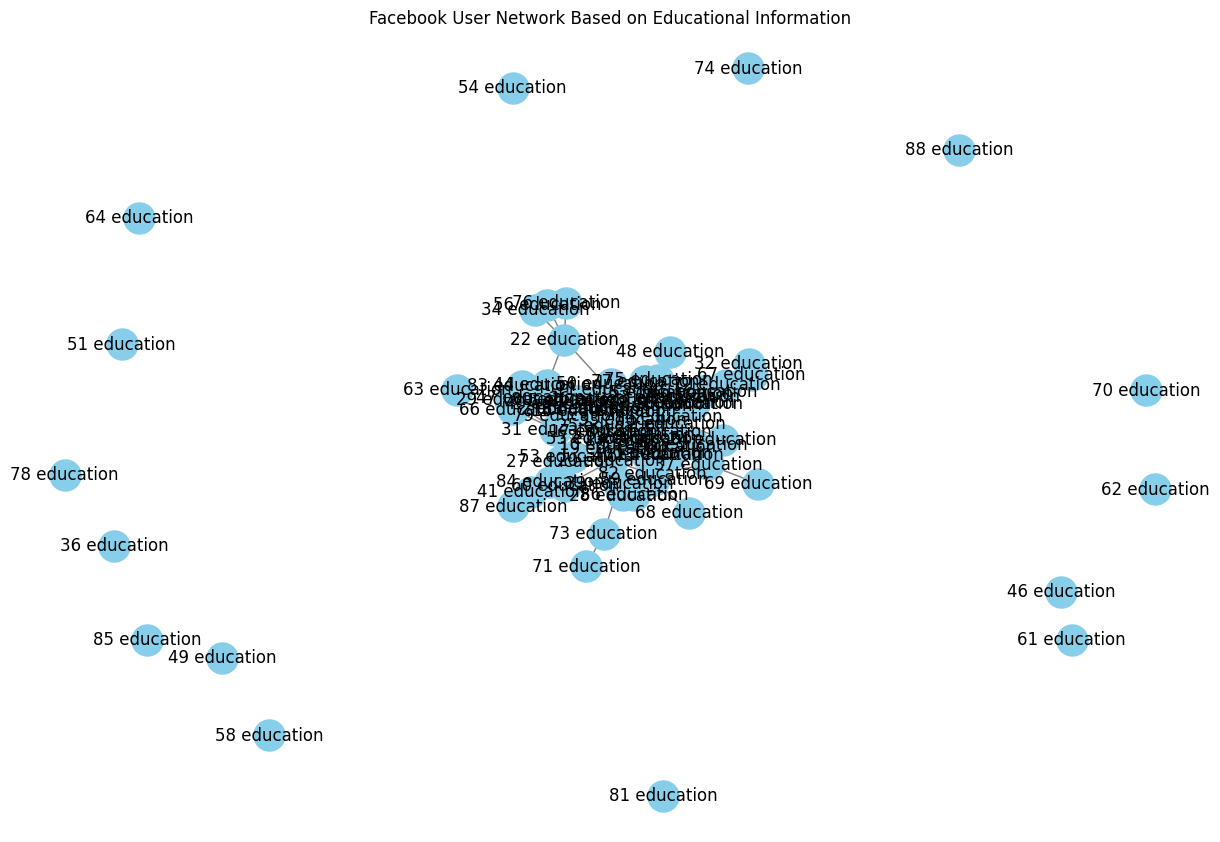

In [13]:
# Part 2: Creating the Network
import networkx as nx
import matplotlib.pyplot as plt

# Initialize the graph
G = nx.Graph()

# Add nodes for each user
all_users = set(user_education_concentration.keys()).union(user_education_degree.keys())
G.add_nodes_from(all_users)

# Add edges for shared educational concentration
concentration_groups = {}
for user_id, concentrations in user_education_concentration.items():
    for concentration in concentrations:
        if concentration not in concentration_groups:
            concentration_groups[concentration] = []
        concentration_groups[concentration].append(user_id)

for users in concentration_groups.values():
    for i in range(len(users)):
        for j in range(i + 1, len(users)):
            G.add_edge(users[i], users[j])

# Add edges for shared educational degree
degree_groups = {}
for user_id, degrees in user_education_degree.items():
    for degree in degrees:
        if degree not in degree_groups:
            degree_groups[degree] = []
        degree_groups[degree].append(user_id)

for users in degree_groups.values():
    for i in range(len(users)):
        for j in range(i + 1, len(users)):
            G.add_edge(users[i], users[j])

# Check if edges were added correctly
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Draw the network
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray')
plt.title("Facebook User Network Based on Educational Information")
plt.show()
